In [1]:
%config IPCompleter.greedy=True

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from nlppreprocess import NLP as npl
from nltk.corpus import stopwords
import nltk
from collections import Counter
plt.style.use('default')
sns.set(style="whitegrid")
pd.options.display.float_format = '{:20,.2f}'.format 

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\paola\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
df = pd.read_csv("train.csv")
df.drop(columns='id', inplace=True)

In [5]:
df.size

30452

In [6]:
df.describe()

,target
count,"7,613.00"
mean,0.43
std,0.50
min,0.00
25%,0.00
50%,0.00
75%,1.00
max,1.00


In [7]:
df.dtypes

keyword     object
location    object
text        object
target       int64
dtype: object

In [8]:
len(df)

7613

In [9]:
df.keyword.value_counts()

fatalities               45
deluge                   42
armageddon               42
harm                     41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [10]:
df.keyword.value_counts(sort=False)

harm           41
wildfire       33
wounds         33
war%20zone     24
inundated      35
               ..
engulfed       36
derail         35
devastation    36
pandemonium    37
bomb           34
Name: keyword, Length: 221, dtype: int64

In [11]:
df.location.value_counts()

USA                        104
New York                    71
United States               50
London                      45
Canada                      29
                          ... 
Lancaster California         1
CA, AZ & NV                  1
Third rock from the Sun      1
Somewhere else...            1
IN                           1
Name: location, Length: 3341, dtype: int64

In [12]:
df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [13]:
df['long']= df['text'].apply(lambda x: len(x))
long_max = df['long'].max()
long_max

157

In [14]:
long_min = df['long'].min()
long_min

7

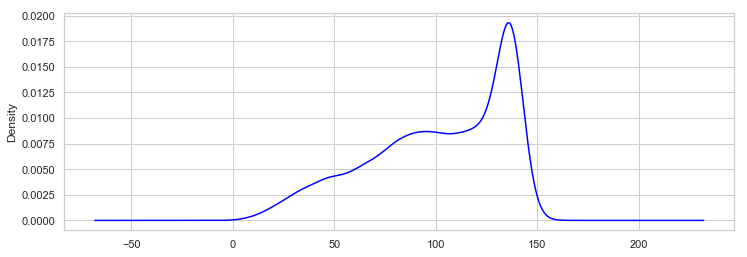

In [15]:
fig = plt.figure(figsize=(12,4))
df.long.plot.kde(color = 'Blue')
plt.show()

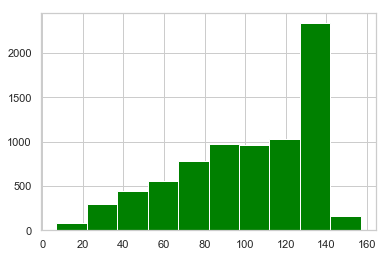

In [16]:
df.long.hist(color='green', bins=10)

In [17]:
long_mean = df['long'].mean()
long_mean

101.03743596479706

In [18]:
df.tail()

,keyword,location,text,target,long
7608,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83
7609,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125
7610,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65
7611,NaN,NaN,Police investigating after an e-bike collided ...,1,137
7612,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1,94


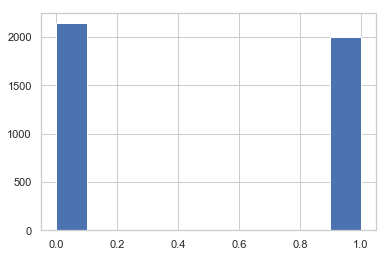

In [19]:
larger_than_mean = df[df['long'] > long_mean]
#larger_than_mean.groupby('target').plot.bar(x='target')
#larger_than_mean.plot.bar(x='target', y=sum(larger_than_mean.groupby('target')))
#plt.bar(larger_than_mean.target, larger_than_mean.target.count())
plt.hist(larger_than_mean.target)
plt.show()

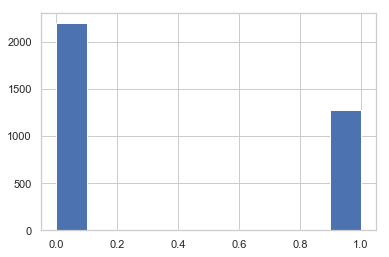

In [20]:
smaller_than_mean = df[df.long < long_mean]
plt.hist(smaller_than_mean.target)
plt.show()

In [21]:
#Busco si los que tienen localizacion tienen mas posibilidad de ser reales

with_loc = df[df.location.notna()]
with_loc.head()

,keyword,location,text,target,long
31,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,55
32,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,67
33,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,82
34,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,34
35,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,76


In [22]:
len(with_loc)

5080

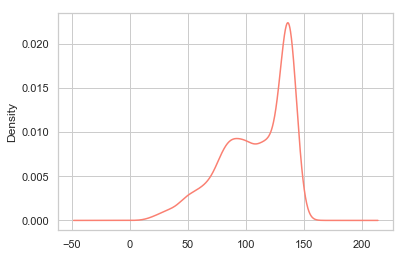

In [23]:
with_loc_real = with_loc[with_loc.target == 1]
with_loc_real.long.plot.kde(color='salmon')

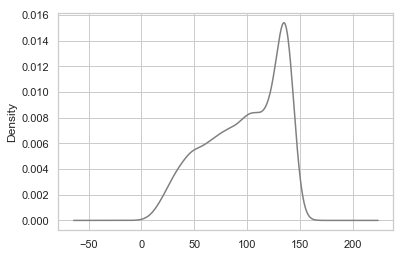

In [24]:
with_loc_false = with_loc[with_loc.target == 0]
with_loc_false.long.plot.kde(color='grey')

In [25]:
len(df.location.isna())

7613

In [26]:
no_loc = df[df.location.isna()]
no_loc.target.value_counts()

0    1458
1    1075
Name: target, dtype: int64

In [27]:
no_loc.tail(50)

,keyword,location,text,target,long
7530,wreckage,NaN,Wreckage is MH370: Najib\nhttp://t.co/iidKC0jS...,1,84
7535,wreckage,NaN,Wreckage 'conclusively confirmed' as from MH37...,1,109
7538,wreckage,NaN,Wreckage 'Conclusively Confirmed' as From MH37...,1,136
7546,wrecked,NaN,good luck to everyone who has school soon but ...,0,93
7549,wrecked,NaN,Cramer: IgerÛªs 3 words that wrecked DisneyÛ...,0,87
7550,wrecked,NaN,Poor Liv and I getting our phones wrecked on t...,0,97
7551,wrecked,NaN,On the freeway to Africa til I wrecked my Audi,0,46
7553,wrecked,NaN,#news Cramer: Iger's 3 words that wrecked Disn...,0,94
7554,wrecked,NaN,James Kunstler: How bad architecture wrecked c...,0,118
7557,wrecked,NaN,You wrecked me. Never felt so low in my life. ...,0,70


In [28]:
def suma_target(grouped_k):
    grouped_k['target_suma']= grouped_k['target'].sum()
    return grouped_k

In [29]:
suma=0
#grouped_k['suma'] = df.groupby(['keyword', 'target']).apply(lambda x: suma + x for x in df['target'] if x== 1)
grouped_k= df.groupby(['keyword']).agg({'target':['sum','count']} ).reset_index()
#grouped_k['sum_target'] = grouped_k['target'].apply('sum')
#grouped_k['suma']= grouped_k.apply(lambda x: (suma + x) for x in grouped_k['target'] if (x== 1))
#grouped_k=df.groupby('keyword')#.apply(suma_target)
#grouped_kl['suma']=grouped_kl.target.apply(sum)
level0= grouped_k.columns.get_level_values(0)
level1= grouped_k.columns.get_level_values(1)
grouped_k.columns = level0 + '_' + level1
grouped_k.insert(loc=2, column='cant_falsas', value=(grouped_k.target_count - grouped_k.target_sum))
#col_rename{'target_sum' : 'cant_reales', 'keyword_':'keyword'})
grouped_k.rename(columns={'target_sum' : 'cant_reales', 'keyword_':'keyword'}, inplace=True)
grouped_k

,keyword,cant_reales,cant_falsas,target_count
0,ablaze,13,23,36
1,accident,24,11,35
2,aftershock,0,34,34
3,airplane%20accident,30,5,35
4,ambulance,20,18,38
...,...,...,...,...
216,wounded,26,11,37
217,wounds,10,23,33
218,wreck,7,30,37
219,wreckage,39,0,39


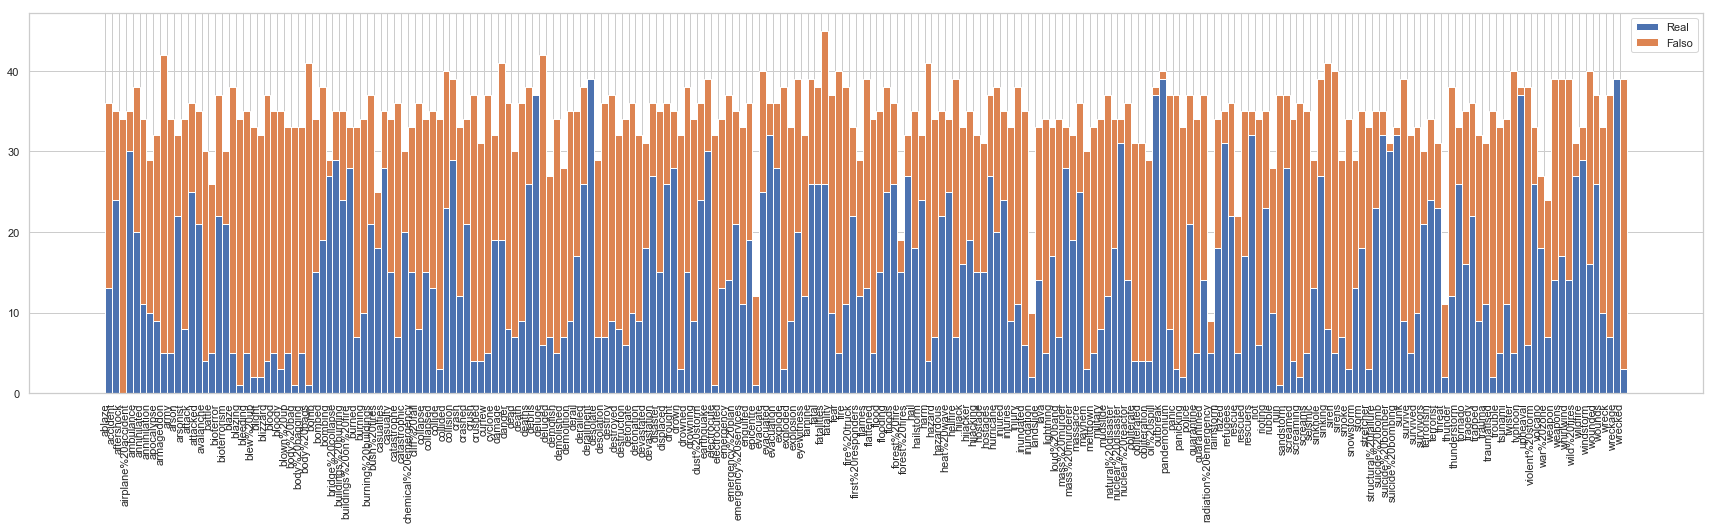

In [30]:
fig = plt.figure(figsize=(30,7))
ax = plt.subplot()
ax.bar(grouped_k.keyword, grouped_k.cant_reales, width = 1, label='Real', align = 'edge')
ax.bar(grouped_k.keyword, grouped_k.cant_falsas, width = 1, bottom=grouped_k.cant_reales, label='Falso', align = 'edge')
plt.xticks(rotation=90)

ax.legend()
plt.show()

In [31]:
stop = stopwords.words('english')

In [32]:
def cuenta_iguales(lista):
    newlist=[]
    for palabra in lista:
        if (lista.count(palabra) > 1):
            newlist.append(lista.count(palabra))
    return newlist

In [33]:
def cuenta_iguales(lista):
    c= Counter(lista)
    count=0
    for key in c:
        if (c[key]>1):
            count+=1
    return count

In [34]:
df['equal_words'] = df.text.agg(lambda x: cuenta_iguales([word for word in x.split() if word not in stop]))


In [35]:
df.head()

,keyword,location,text,target,long,equal_words
0,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,0
1,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,0
2,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,0
3,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,0
4,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,0


In [36]:
word_count = df.groupby(['equal_words'])['target'].agg({'sum','count'} ).reset_index()

In [37]:
word_count.head(30)

,equal_words,count,sum
0,0,6465,2810
1,1,905,353
2,2,182,76
3,3,37,16
4,4,15,11
5,5,5,3
6,6,1,0
7,8,2,1
8,9,1,1


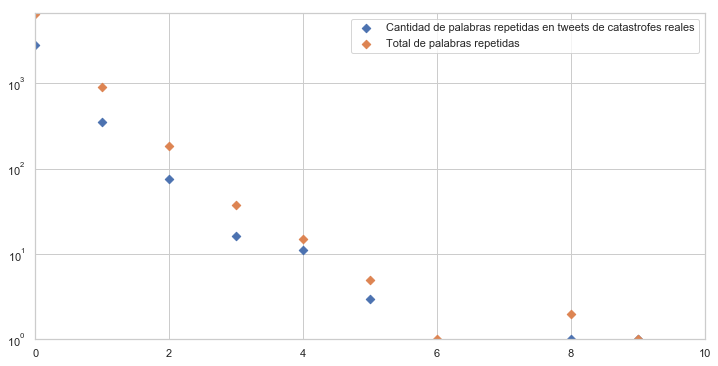

In [38]:
fig,ax = plt.subplots(figsize=(12,6))
cambio = lambda x: 'Total de palabras repetidas' if (x=='count') else 'Cantidad de palabras repetidas en tweets de catastrofes reales'
for name in ['sum','count']:
    ax.scatter(word_count.equal_words, word_count[name],  marker= 'D', label= cambio(name) )
    ax.set_ylim(1,6600)  
    ax.set_xlim(0,10)
    ax.set_yscale("log")
    plt.legend()

In [39]:
df['Tags']= df['text'].agg(lambda x: x.count('@'))

In [40]:
tag_count = df.groupby(['Tags'])['target'].agg({'sum','count'}).reset_index()
tag_count.head(20)

,Tags,count,sum
0,0,5574,2595
1,1,1553,519
2,2,343,102
3,3,87,41
4,4,31,11
5,5,18,3
6,6,5,0
7,7,1,0
8,8,1,0


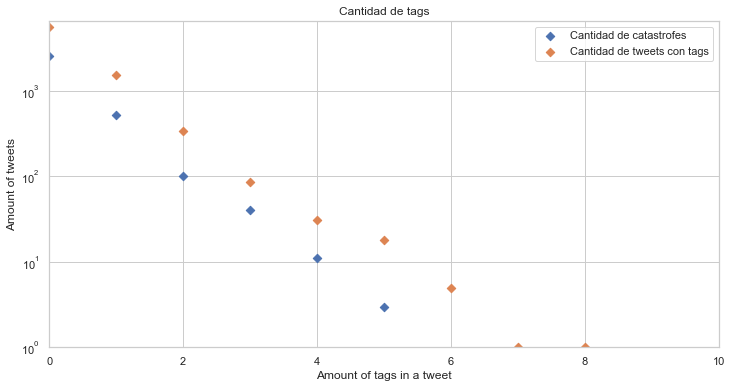

In [41]:

fig,ax = plt.subplots(figsize=(12,6))
tag_count.rename(columns={'sum' : 'Cantidad de catastrofes', 'count':'Cantidad de tweets con tags'}, inplace=True)
for name in ['Cantidad de catastrofes','Cantidad de tweets con tags']:
    ax.scatter(tag_count.Tags, tag_count[name],  marker= 'D' , label=name)
    ax.set_ylim(1,6600)  
    ax.set_xlim(0,10)
    ax.set_yscale("log")
    ax.set_xlabel('Amount of tags in a tweet')
    ax.set_ylabel('Amount of tweets')
    plt.legend()
    plt.title('Cantidad de tags')

In [42]:
df['with_url']= df.text.str.contains("http")

df['with_url']=df['with_url'].astype(int)

In [43]:
url_count = df.groupby(['with_url'])['target'].agg({'sum','count'}).reset_index()

url_count.rename(columns={'sum' : 'Cantidad de catastrofes', 'count':'Cantidad de tweets con url'}, inplace=True)
url_count.head()

,with_url,Cantidad de tweets con url,Cantidad de catastrofes
0,0,3642,1099
1,1,3971,2172


[Text(0,0,'Without url'), Text(0,0,'With url')]

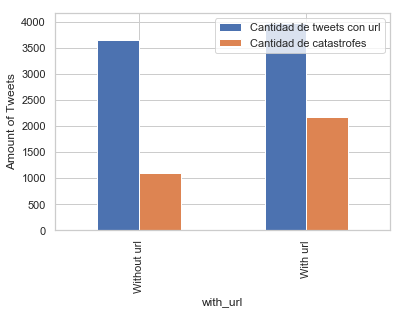

In [51]:
fig = url_count.set_index('with_url').plot(kind='bar', )
fig.axes.set_ylabel('Amount of Tweets')
fig.axes.set_xticklabels(['Without url', 'With url'])

In [52]:
df['with_date'] = df.text.str.contains('\w*\d\w*').astype(int)
date_count = df.groupby(['with_date'])['target'].agg({'sum','count'}).reset_index()
date_count.rename(columns={'sum' : 'Cantidad de catastrofes', 'count':'Cantidad de tweets con fecha'}, inplace=True)

[Text(0,0,'Without date'), Text(0,0,'With date')]

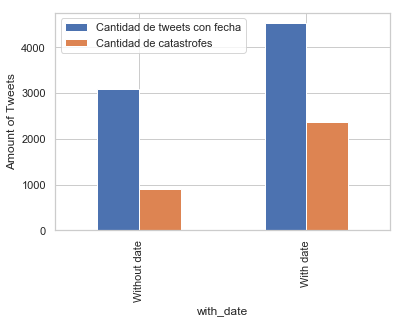

In [53]:
fig = date_count.set_index('with_date').plot(kind='bar' )
fig.axes.set_ylabel('Amount of Tweets')
fig.axes.set_xticklabels(['Without date', 'With date'])

In [90]:
dfcor = df.drop(columns=['keyword', 'location', 'text', 'long'])


In [91]:
df2=dfcor.groupby('target').agg(['sum'])
level0= df2.columns.get_level_values(0)
level1= df2.columns.get_level_values(1)
df2.columns = level0 + '_' + level1
#df2.insert(loc=2, column='cant_falsas', value=(grouped_k.target_count - grouped_k.target_sum))
df2.head()

,equal_words_sum,Tags_sum,with_url_sum,with_date_sum
target,,,,
0,867,1854,1799,2155
1,629,905,2172,2370


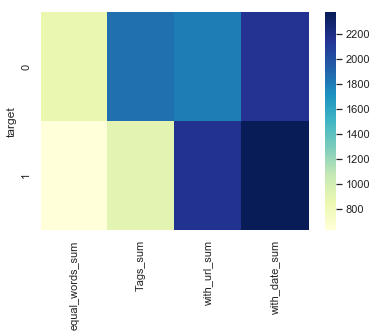

In [95]:
sns.heatmap(df2, cmap="YlGnBu")

In [98]:
df3=dfcor.groupby('target').agg(['mean'])
level0= df3.columns.get_level_values(0)
level1= df3.columns.get_level_values(1)
df3.columns = level0 + '_' + level1
#df2.insert(loc=2, column='cant_falsas', value=(grouped_k.target_count - grouped_k.target_sum))
df3.head()

,equal_words_mean,Tags_mean,with_url_mean,with_date_mean
target,,,,
0,0.20,0.43,0.41,0.50
1,0.19,0.28,0.66,0.72


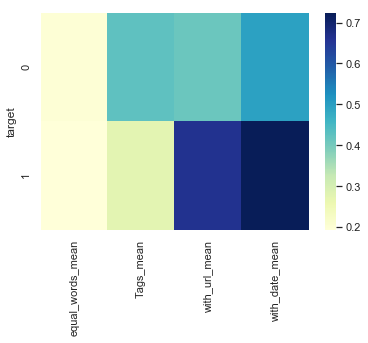

In [101]:
sns.heatmap(df3, cmap="YlGnBu")